In [57]:
import matplotlib.pyplot as plt
import os, PIL

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

import pathlib

In [59]:
data_dir = 'bird_photos'

data_dir = pathlib.Path(data_dir)

In [61]:
image_count = len(list(data_dir.glob('*/*')))

print('图片总数为: ', image_count)

图片总数为:  565


In [63]:
batch_size = 8
img_height = 227
img_width = 227

In [65]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 565 files belonging to 4 classes.
Using 452 files for training.
Found 565 files belonging to 4 classes.
Using 113 files for validation.


In [67]:
class_names = train_ds.class_names
print(class_names)

['Bananaquit', 'Black Skimmer', 'Black Throated Bushtiti', 'Cockatoo']


2025-08-14 09:44:33.155981: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


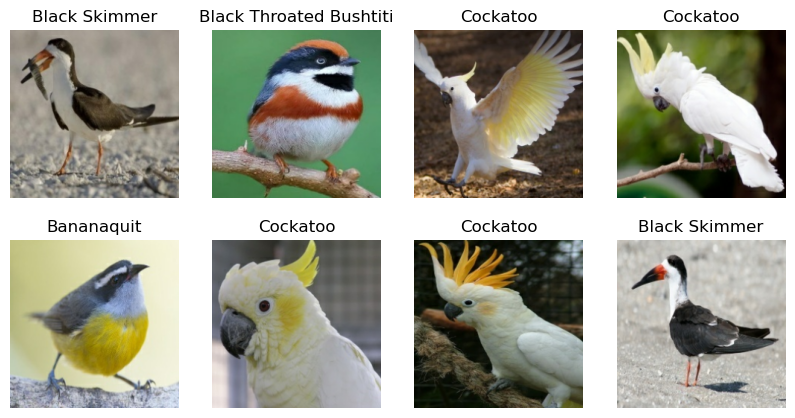

In [69]:
plt.figure(figsize=(10, 5))

for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

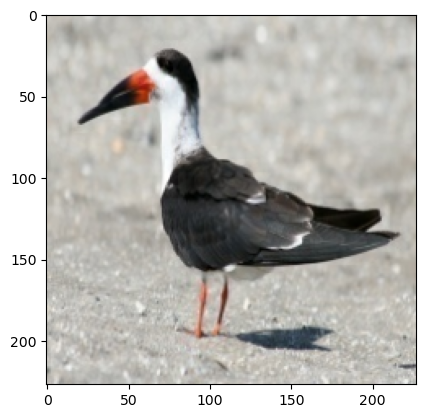

In [70]:
plt.imshow(images[i].numpy().astype('uint8'))

In [73]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 227, 227, 3)
(8,)


In [75]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [77]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

import numpy as np
seed = 7
np.random.seed(seed)

def AlexNet(nb_classes,  input_shape):
    input_tensor = Input(shape=input_shape)
    # 1
    x = Conv2D(96, (11, 11), strides=4, name='block1_conv1')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=2, name='block1_pool1')(x)

    # 2
    x = Conv2D(256, (5, 5), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=2, name='block2_pool1')(x)

    # 3
    x = Conv2D(384, (3, 3), padding='same', name='block3_conv1')(x)

    # 4
    x = Conv2D(384, (3, 3), padding='same', name='block4_conv1')(x)

    # 5
    x = Conv2D(256, (3, 3), padding='same', name='block5_conv1')(x)
    x = MaxPooling2D((3, 3), strides=2, name='block5_pool1')(x)

    # fully connection
    x = Flatten()(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(nb_classes, activation='softmax', name='predictions')(x)

    model = Model(input_tensor, output_tensor)
    return model

model = AlexNet(1000, (img_width, img_height, 3))
model.summary()
    

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool1 (MaxPooling2D)     │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool1 (MaxPooling2D)     │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool1 (MaxPooling2D)     │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,379,752 (237.96 MB)

 Trainable params: 62,379,048 (237.96 MB)

 Non-trainable params: 704 (2.75 KB)

In [79]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-7)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - accuracy: 0.3009 - loss: 196.7862 - val_accuracy: 0.3186 - val_loss: 92.6748
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.4027 - loss: 22.4593 - val_accuracy: 0.3894 - val_loss: 6.2233
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.5575 - loss: 6.3290 - val_accuracy: 0.6460 - val_loss: 1.9512
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.6903 - loss: 1.8905 - val_accuracy: 0.6460 - val_loss: 1.1511
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - accuracy: 0.7389 - loss: 0.9859 - val_accuracy: 0.7080 - val_loss: 0.8760
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 516ms/step - accuracy: 0.7854 - loss: 0.6781 - val_accuracy: 0.8319 - val_loss: 0.5881
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 431ms/step - accuracy: 0.8230 - loss: 0.5711 - val_accuracy: 0.8407 - val_loss: 0.5226
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 409ms/step - accuracy: 0.8186 - loss: 0.5215 - val_

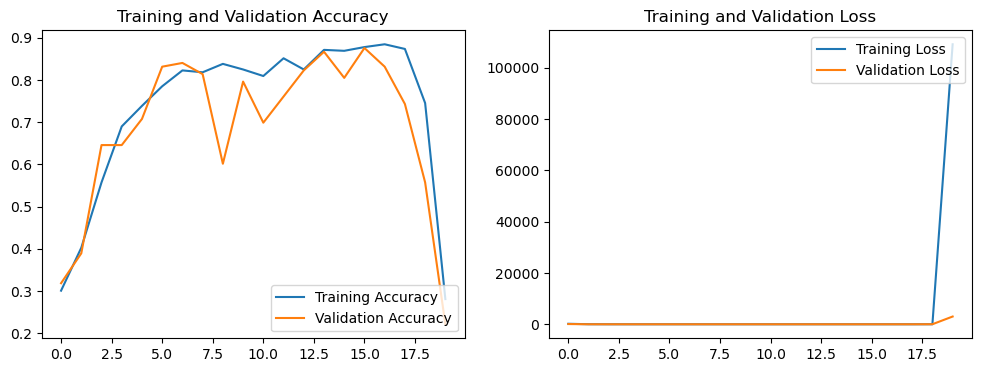

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
model.save('AlexNet.h5')

new_model = tf.keras.models.load_model('AlexNet.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


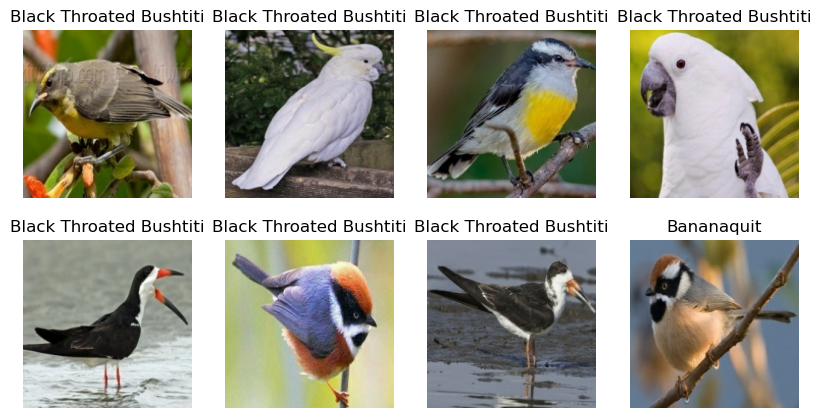

In [84]:
plt.figure(figsize=(10, 5))
for images, labels in val_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        img_array = tf.expand_dims(images[i], 0)
        predictions = new_model.predict(img_array)
        plt.title(class_names[np.argmax(predictions)])

        plt.axis('off')